In [1]:
%matplotlib inline 
from sympy import *
init_printing()

t,x0,x1,rho = symbols("t x0 x1 rho")
h = symbols("h", positive=True, real=True)
R = symbols("R", positive=True, real=True)

P0 = 1-t
P1 = t
P2 = t*(1-t)

x = x0 * P0 + x1 * P1 + rho * P2
dx = diff(x, t)
Q = integrate(- R * x**2, (t, 0, 1)) # in practice R = R * h, R is considered normalized by the step size

PowerBalance = Eq( Rational(1,2) * (x1**2 - x0**2), Q)

In [2]:
x

In [3]:
dx

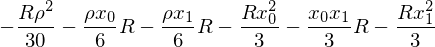

In [4]:
Q

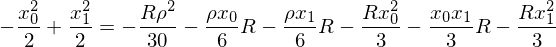

In [5]:
PowerBalance

In [6]:
x1_est = x0 * (1-R/2)/(1+R/2)

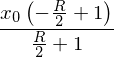

In [7]:
x1_est

In [8]:
sols = solve(PowerBalance.subs(x1, x1_est), rho)

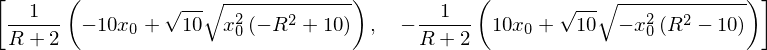

In [9]:
sols

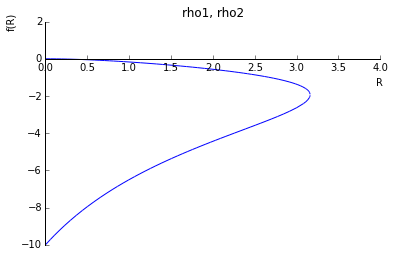

In [17]:
plot(sols[0].subs(x0, 1), sols[1].subs(x0, 1), (R, 0, 4), title="rho1, rho2");

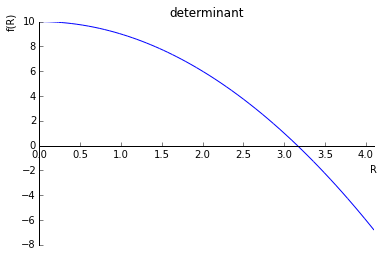

In [16]:
plot(-R**2 + 10, (R, 0, 4.1), title="determinant");

In [12]:
x_solved = x.subs(x1, x1_est).subs(rho, sols[0])
dx_solved = dx.subs(x1, x1_est).subs(rho, sols[0])

In [13]:
pprint(x_solved)
pprint(dx_solved)

     ⎛  R    ⎞              ⎛                   _________________⎞            
t⋅x₀⋅⎜- ─ + 1⎟              ⎜           ____   ╱   2 ⎛   2     ⎞ ⎟            
     ⎝  2    ⎠   t⋅(-t + 1)⋅⎝-10⋅x₀ + ╲╱ 10 ⋅╲╱  x₀ ⋅⎝- R  + 10⎠ ⎠            
────────────── + ───────────────────────────────────────────────── + x₀⋅(-t + 
    R                                  R + 2                                  
    ─ + 1                                                                     
    2                                                                         

  
  
  
1)
  
  
  
    ⎛                   _________________⎞      ⎛  R    ⎞                 ⎛   
    ⎜           ____   ╱   2 ⎛   2     ⎞ ⎟   x₀⋅⎜- ─ + 1⎟                 ⎜   
  t⋅⎝-10⋅x₀ + ╲╱ 10 ⋅╲╱  x₀ ⋅⎝- R  + 10⎠ ⎠      ⎝  2    ⎠        (-t + 1)⋅⎝-10
- ──────────────────────────────────────── + ──────────── - x₀ + ─────────────
                   R + 2                        R                             
                              

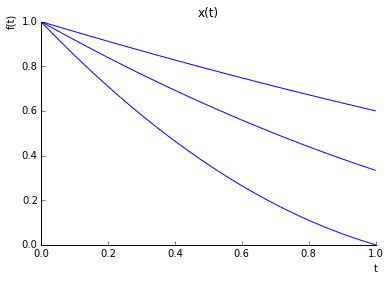

In [15]:
xR1 = x_solved.subs(x0,1).subs(R,1)
xR2 = x_solved.subs(x0,1).subs(R,2)
xR1_2 = x_solved.subs(x0,1).subs(R,0.5)
plot(xR1, xR2, xR1_2,(t, 0, 1), title='x(t)', ylim=[0, 1]);